In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pointbiserialr
from datetime import timedelta

# Function to dynamically identify health-related columns
def identify_health_labels(df, exclude_cols=['cow', 'duration_hours', 'IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL']):
    # Identify columns that are likely binary health indicators
    potential_health_cols = [col for col in df.columns if col not in exclude_cols]
    health_labels = [col for col in potential_health_cols 
                    if df[col].dropna().isin([0, 1]).all()]
    return health_labels

**Load the dataset**

In [12]:
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    # df['date'] = pd.to_datetime(df['date'])
    return df

### **Dataset First View**

In [13]:
def display_dataset_head(df):
    return df.head()

### **Dataset Rows & Columns count**

In [14]:
def print_dataset_shape(df):
    print("Number of rows are: ",df.shape[0])
    print("Number of columns are: ",df.shape[1])

**Displaying Column Names**

In [15]:
def display_column_names(df):
    print(df.columns)

**Define behavioral and health-related features**

In [16]:
def define_features(df):
    behavioral_features = ['IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL']
    health_indicators = identify_health_labels(df)
    return behavioral_features, health_indicators

**Distribution of health states**

In [17]:
def plot_health_states_distribution(df):
    health_states = identify_health_labels(df)
    if not health_states:
        print("No health states identified in the dataset.")
        return
    df_health = df[health_states]
    health_counts = df_health.sum().sort_values(ascending=False)
    total = len(df)
    health_percent = (health_counts / total) * 100

    safe_health_percent = health_percent.copy()
    safe_health_percent[safe_health_percent == 0] = 0.01

    plt.figure(figsize=(12, 6))
    bars = plt.bar(safe_health_percent.index, safe_health_percent.values, color='lightcoral')

    for i, bar in enumerate(bars):
        original = health_percent.values[i]
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
                 f'{original:.2f}%', ha='center', va='bottom')

    plt.yscale('log')
    plt.title('Proportion of Health States (Log Scale)', fontweight='bold')
    plt.xlabel('Health States', fontweight='bold')
    plt.ylabel('Percentage (log scale)', fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
    plt.tight_layout()
    plt.show()

**Visualization of Health States Proportions**

In [18]:
def plot_health_states_proportions(file_path):
    df = pd.read_csv(file_path)
    health_states = identify_health_labels(df)
    if not health_states:
        print("No health states identified in the dataset.")
        return

    df_health = df[health_states]
    health_counts = df_health.sum().sort_values(ascending=False)
    total = len(df)
    health_percent = (health_counts / total) * 100

    plt.figure(figsize=(12, 6))
    bars = plt.bar(health_percent.index, health_percent.values, color='lightcoral')

    # Formatting: 2 decimal places
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}%',  # .2f = 2 decimal places
                 ha='center', va='bottom')

    plt.title('Proportion of Health States (in %)', fontweight='bold')
    plt.xlabel('Health States', fontweight='bold')
    plt.ylabel('Percentage', fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [19]:
def analyze_multiple_diseases(df):
    maladie_cols = [col for col in identify_health_labels(df) if col != 'OK']
    if not maladie_cols:
        print("No disease columns identified in the dataset.")
        return

    df_non_ok = df[df['OK'] == 0].copy()

    df_non_ok['nb_maladies'] = df_non_ok[maladie_cols].sum(axis=1)

    # Keep only rows with more than one disease
    multi_maladie = df_non_ok[df_non_ok['nb_maladies'] > 1].copy()

    # Extract the names of the diseases present
    def get_maladies_presentes(row):
        return [col for col in maladie_cols if row[col] == 1]

    multi_maladie['maladies_presentes'] = multi_maladie.apply(get_maladies_presentes, axis=1)

    # Display results
    print(f"Number of cases with multiple diseases: {len(multi_maladie)}")
    print(multi_maladie[['cow', 'date', 'hour', 'maladies_presentes']])


Analyzing C:/Users/lamia/Downloads/augmented_dataset11.csv

Dataset First View:

Dataset Rows & Columns count:
Number of rows are:  120591
Number of columns are:  30

Column Names:
Index(['cow', 'duration_hours', 'Minimum', 'Maximum', 'RMS', 'STD', 'Mode',
       'Q10', 'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1',
       'Autocorr2', 'Autocorr3', 'Autocorr4', 'Autocorr5', 'Autocorr11', 'h1',
       'h2', 'h3', 'h4', 'oestrus', 'calving', 'lameness', 'mastitis',
       'other_disease', 'OK'],
      dtype='object')

Distribution of Health States:


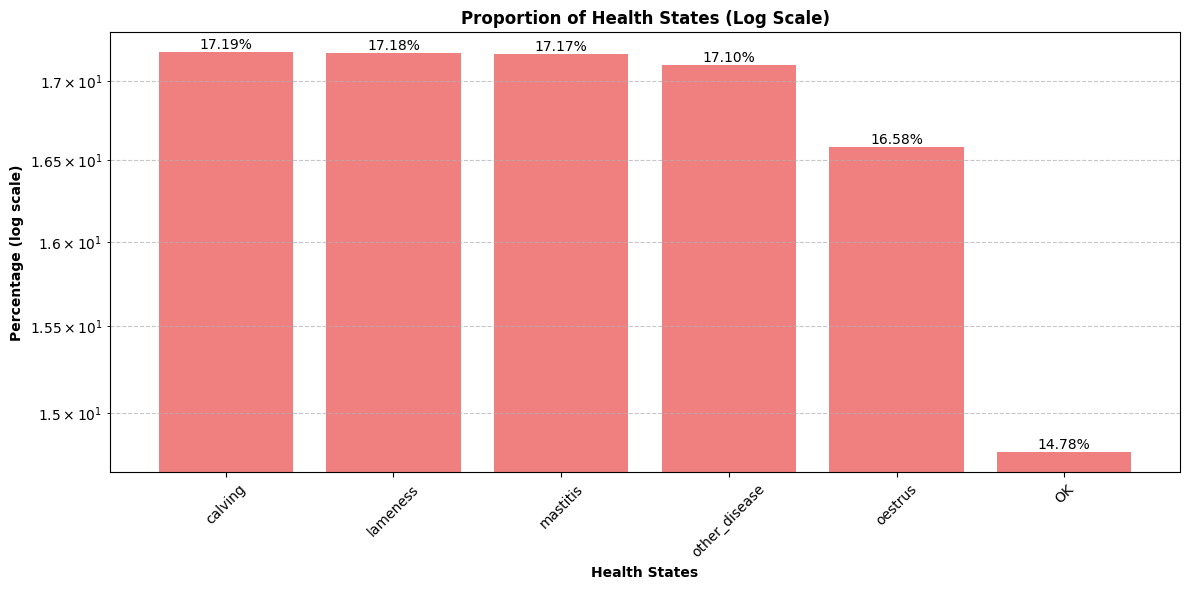


Data Distribution Histograms:


NameError: name 'plot_histograms' is not defined

In [20]:

datasets = [r"C:/Users/lamia/Downloads/augmented_dataset11.csv"]  
# datasets = [r"C:/Users/lamia/Desktop/datasets/dataset1.csv"]  

for file_path in datasets:
    print(f"\nAnalyzing {file_path}")
    df = load_dataset(file_path)
    print("\nDataset First View:")
    display_dataset_head(df)
    print("\nDataset Rows & Columns count:")
    print_dataset_shape(df)
    print("\nColumn Names:")
    display_column_names(df)
    behavioral_features, health_indicators = define_features(df)
    print("\nDistribution of Health States:")
    plot_health_states_distribution(df)
    
    print("\nData Distribution Histograms:")
    plot_histograms(df)
    print("\nHealth States Proportions:")
    plot_health_states_proportions(file_path)
    
    print("\nAnalysis of Cows with Multiple Diseases:")
    analyze_multiple_diseases(df)
    